In [ ]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_input.shape

(60000, 28, 28)

In [ ]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target)

In [ ]:
# 모델을 함수화하기

def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [ ]:
model = model_fn()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(train_scaled, train_target)

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7683 - loss: 0.6754


In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
result = model.fit(train_scaled, train_target, epochs=5) # 5번 하는 변화 폭을 보기 위해

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8947 - loss: 0.2957
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8975 - loss: 0.2857
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9039 - loss: 0.2707
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9037 - loss: 0.2679
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9053 - loss: 0.2642


In [ ]:
result.history.keys() # 앞 history는 변수명
# accuracy 정확도 loss 손실

dict_keys(['accuracy', 'loss'])

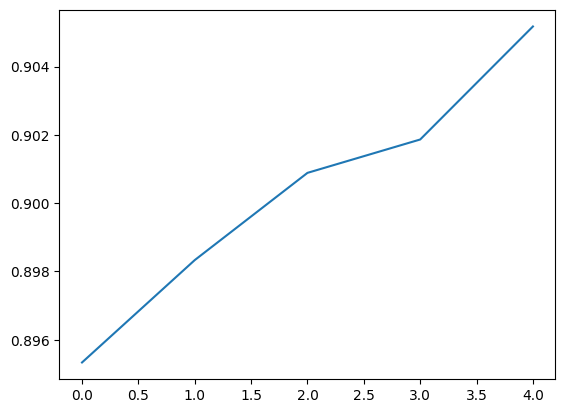

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy']) # 정확도

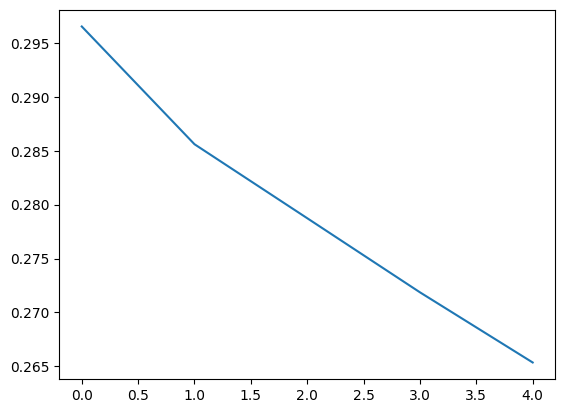

In [ ]:
plt.plot(result.history['loss']) # 손실

In [ ]:
# 에포크값을 올리면 정확도가 더 증가될까?
# 조금 더 훈련시켜보자

In [ ]:
model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9081 - loss: 0.2586
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9125 - loss: 0.2495
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9143 - loss: 0.2438
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9139 - loss: 0.2414
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9168 - loss: 0.2352
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9183 - loss: 0.2310
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9204 - loss: 0.2259
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9215 - loss: 0.2242
Epoch 9/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9256 - loss: 0.2139
Epoch 10/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9239 - loss: 0.2170
Epoch 11/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9271 - loss: 0.2120
Epoch 12/20
1407/1407 ━━━━━━━━

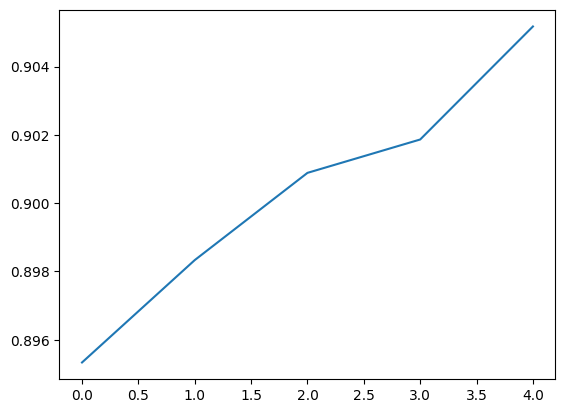

In [ ]:
plt.plot(result.history['accuracy'])

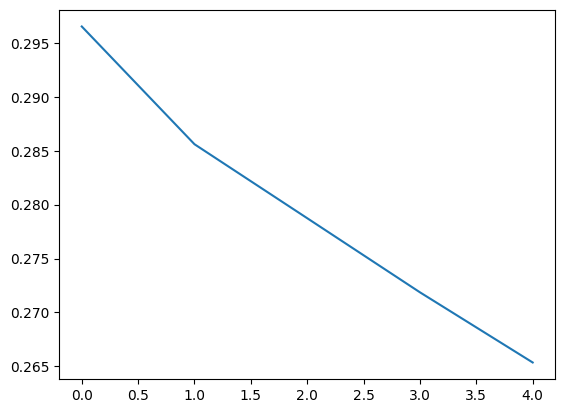

In [ ]:
plt.plot(result.history['loss'])

In [ ]:
# 과대적합인지 확인하기 (검증)

In [ ]:
model = model_fn()
model.compile(
    loss='sparse_categorical_crossentropy', metrics=['accuracy']
)

result = model.fit(
    train_scaled,
    train_target,
    epochs=20,
    validation_data=(val_scaled, val_target) # 검증점수
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7637 - loss: 0.6913 - val_accuracy: 0.8303 - val_loss: 0.4704
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8526 - loss: 0.4134 - val_accuracy: 0.8360 - val_loss: 0.4780
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8665 - loss: 0.3748 - val_accuracy: 0.8693 - val_loss: 0.3648
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8780 - loss: 0.3396 - val_accuracy: 0.8705 - val_loss: 0.3616
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8854 - loss: 0.3203 - val_accuracy: 0.8747 - val_loss: 0.3579
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8882 - loss: 0.3075 - val_accuracy: 0.8760 - val_loss: 0.3610
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8938 - loss: 0.3010 - val_accuracy: 0.8806 - val_loss: 0.3445
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8952 - loss: 0.2888 - 

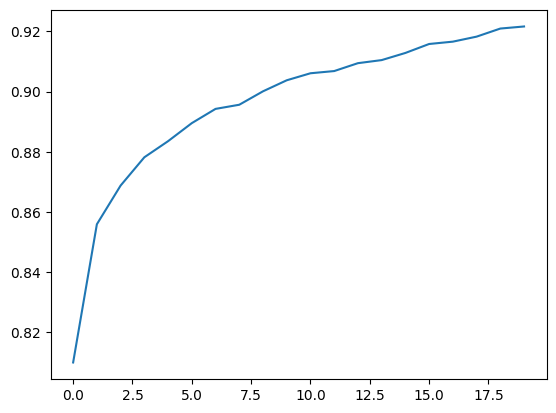

In [ ]:
plt.plot(result.history['accuracy'])
# 훈련을 하면 할 수록 최적화가 되기 때문에 점수가 높음

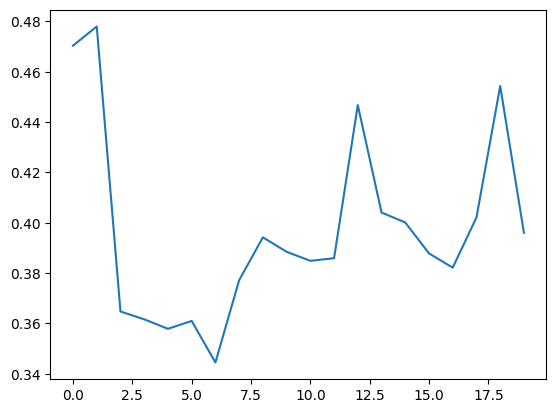

In [ ]:
plt.plot(result.history['val_loss'])
# val의 손실값
# 데이터가 들쑥날쑥 = 과대적합

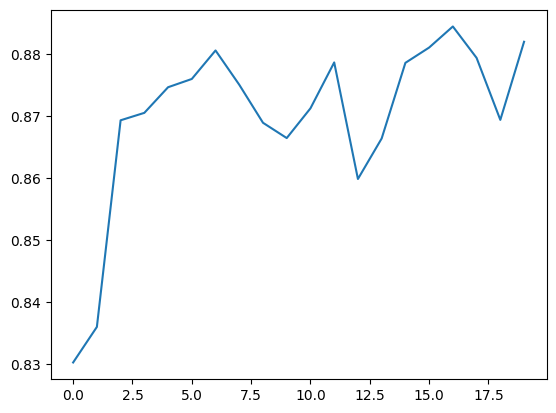

In [ ]:
plt.plot(result.history['val_accuracy'])
# val의 손실값
# 데이터가 들쑥날쑥 = 과대적합
# 에포크 5번째부터 들쑥날쑥하기 시작함

In [ ]:
# Adam

In [ ]:
model = model_fn()
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

result = model.fit(
    train_scaled,
    train_target,
    epochs=20,
    validation_data=(val_scaled, val_target)
)

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7671 - loss: 0.6834 - val_accuracy: 0.8463 - val_loss: 0.4338
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8551 - loss: 0.4084 - val_accuracy: 0.8631 - val_loss: 0.3788
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8704 - loss: 0.3574 - val_accuracy: 0.8648 - val_loss: 0.3713
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8779 - loss: 0.3347 - val_accuracy: 0.8731 - val_loss: 0.3561
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8847 - loss: 0.3152 - val_accuracy: 0.8786 - val_loss: 0.3312
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8894 - loss: 0.2990 - val_accuracy: 0.8754 - val_loss: 0.3400
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8981 - loss: 0.2753 - val_accuracy: 0.8751 - val_loss: 0.3436
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9011 - loss: 0.2663 - 

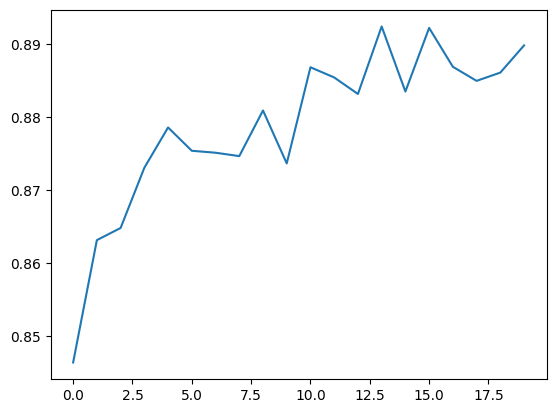

In [ ]:
plt.plot(result.history['val_accuracy'])

In [ ]:
# 드롭아웃
# 100개의 뉴런 중 일부 뉴런을 랜덤하게 꺼서 점수를 계산해봄

In [ ]:
model = model_fn(keras.layers.Dropout(0.3)) # 30퍼센트를 껐다켰다 해볼겡
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

result = model.fit(
    train_scaled,
    train_target,
    epochs=20,
    validation_data=(val_scaled, val_target))

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7364 - loss: 0.7585 - val_accuracy: 0.8183 - val_loss: 0.4867
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8389 - loss: 0.4405 - val_accuracy: 0.8594 - val_loss: 0.3921
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8517 - loss: 0.4070 - val_accuracy: 0.8596 - val_loss: 0.3806
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8596 - loss: 0.3822 - val_accuracy: 0.8690 - val_loss: 0.3662
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8654 - loss: 0.3677 - val_accuracy: 0.8679 - val_loss: 0.3615
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8723 - loss: 0.3542 - val_accuracy: 0.8692 - val_loss: 0.3444
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8758 - loss: 0.3426 - val_accuracy: 0.8780 - val_loss: 0.3287
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8743 - loss: 0.3405 - 

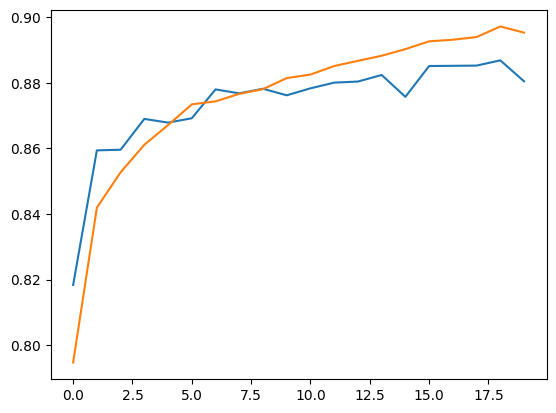

In [ ]:
plt.plot(result.history['val_accuracy'])
plt.plot(result.history['accuracy'])
# dropout을 통해 집중도를 낮춰서 보편적인 결과를 도출함

In [ ]:
# 모델저장과 복원
# 다른 컴퓨터에서 다시 사용하려면 똑같은 코드 가져와서 다시 학습을 시켜야 하기 때문에 모델 저장이 필요함

In [ ]:
model.save_weights('my_model.weights.h5')
# weights는 가중치만 저장, 파일 이름 확장자가 무조건 weights.h5여야한대...

In [ ]:
model.save('my_model.keras') # .keras는 모델 자체

In [ ]:
# 콜백

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 에포크 돌릴 때마다 정확도를 파악할 것이며 가장 정확도가 좋은 모델을 best_model.keras에 넣어줄 것
cp = keras.callbacks.ModelCheckpoint(
    'best-mode.keras',
    save_best_only=True
)
es = keras.callbacks.EarlyStopping(patience=2)


result = model.fit(
    train_scaled,
    train_target,
    epochs=20,
    validation_data=(val_scaled, val_target),
    callbacks=[cp, es] # 손실함수값이 떨어질 때까지 학습하고, 만약 올라가는 경우 학습중지
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7187 - loss: 0.7866 - val_accuracy: 0.8379 - val_loss: 0.4604
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8330 - loss: 0.4661 - val_accuracy: 0.8557 - val_loss: 0.4020
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8476 - loss: 0.4176 - val_accuracy: 0.8536 - val_loss: 0.3910
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8577 - loss: 0.3945 - val_accuracy: 0.8663 - val_loss: 0.3683
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8635 - loss: 0.3705 - val_accuracy: 0.8755 - val_loss: 0.3434
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8673 - loss: 0.3639 - val_accuracy: 0.8780 - val_loss: 0.3373
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8729 - loss: 0.3479 - val_accuracy: 0.8743 - val_loss: 0.3450
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8749 - loss: 0.3370 - val_accurac

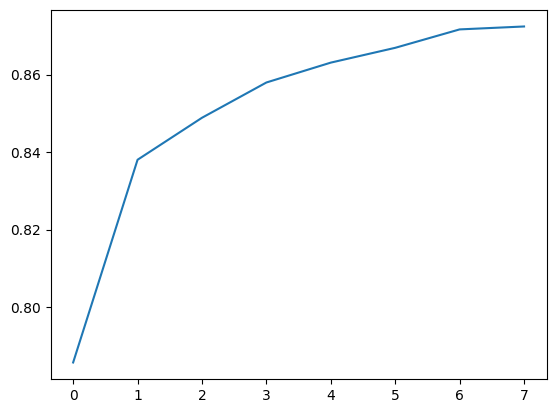

In [ ]:
plt.plot(result.history['accuracy'])